In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import eig

# datos del sistema
Mc = 250
Kc = 15000
Bc = 1000
Mw = 40
Kw = 12500
Bw = 100
g = 9.81

# autovalores del sistema
A = [[0,1,0,0],[-(Kc+Kw)/Mw,-(Bc+Bw)/Mw,Kc/Mw,Bc/Mw],[0,0,0,1],[Kc/Mc,Bc/Mc,-Kc/Mc,-Bc/Mc]]
print(eig(A))
# funcion a integrar
def f(t,x):

    # entrada
    if t < 1:
        r=0
    elif t < 4:
        r = 0.05
    else:
        r = 0 
    dt = 0.01
      # entrada anterior
    
    if t-dt < 1:
        rant=0
    elif t-dt < 4:
        rant = 0.05
    else:
        rant = 0 
    dr = (r-rant)/dt
    f1 = x[1]
    f2 = -(Kc+Kw)/Mw*x[0] - (Bc+Bw)/Mw*x[1] + Kc/Mw*x[2]+Bc/Mw*x[3] + Kw/Mw * r + Bw/Mw * dr - g
    f3 = x[3]
    f4 = Kc/Mc*x[0]+Bc/Mc*x[1]-Kc/Mc*x[2]-Bc/Mc*x[3]-g
    return [f1,f2,f3,f4]

res = solve_ivp(f,[0,10],[-0.02275,0,-0.1863,0])

    


(array([-15.33550039+21.68684333j, -15.33550039-21.68684333j,
        -0.41449961 +5.13859986j,  -0.41449961 -5.13859986j]), array([[-0.0215154 -0.03042621j, -0.0215154 +0.03042621j,
         0.00482567-0.09567644j,  0.00482567+0.09567644j],
       [ 0.98979793+0.j        ,  0.98979793-0.j        ,
         0.48964272+0.06445501j,  0.48964272-0.06445501j],
       [ 0.00108821+0.00505803j,  0.00108821-0.00505803j,
        -0.01323226-0.16404181j, -0.01323226+0.16404181j],
       [-0.12638089-0.05396748j, -0.12638089+0.05396748j,
         0.84843001+0.j        ,  0.84843001-0.j        ]]))


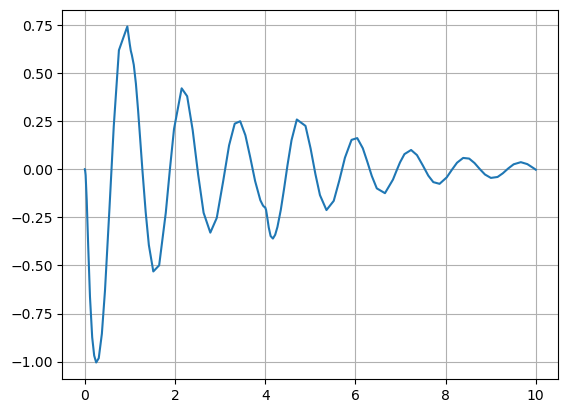

In [29]:
plt.plot(res.t,res.y[3])
plt.grid()

In [ ]:
ll=np.array([[-(Kc+Kw)/Mw,Kc/Mw],[Kc/Mc,-Kc/Mc]])
bb = np.array([g,g])